In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
def parse_data(filename):
    with open(filename, "r") as f:
        lines = f.readlines()

    epoch = []
    loss = []
    time = []
    val = []
    test = []
    train = []

    for data in lines:

        val.append(np.nan)
        test.append(np.nan)
        train.append(np.nan)

        vals = data.split(",")
        epoch.append(int(vals[0].strip().split()[-1]))
        loss.append(float(vals[1].strip().split()[-1]))
        time.append(float(vals[2].strip().split()[-1].split(":")[-1]))

        if len(vals) > 3:
            val[-1] = float(vals[4].strip().split()[-1])
            test[-1] = float(vals[5].strip().split()[-1])
            train[-1] = float(vals[3].strip().split()[-1])

    df = pd.DataFrame(
        {
            "epoch" : epoch, 
            "loss" : loss, 
            "time" : time,
            "val" : val, 
            "test" : test,
            "train" : train,
        }
    )
    
    df = df.fillna(method='ffill')
    
    return df

ClusterGCN  

GraphSAINT - Capital One  
GraphSAINT - Pytorch Geometric  

# ClusterGCN with same batch and same learning rate

- ogb-products - 7.9 Gb 

- For validation + testing, kept getting out of memory issues, even after considerably changing the batch size to a small value  
- Therefore, only the loss and train accuracy is shown below:

- (best results)

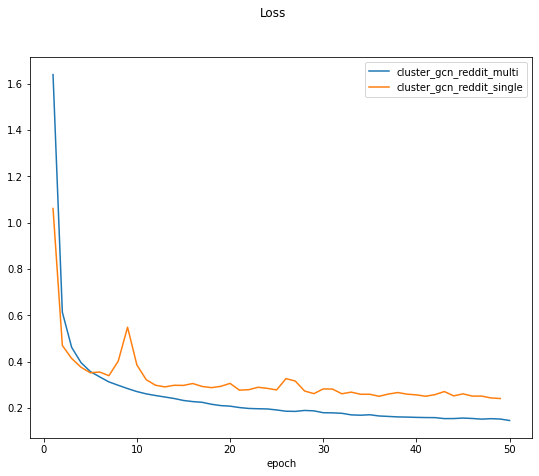

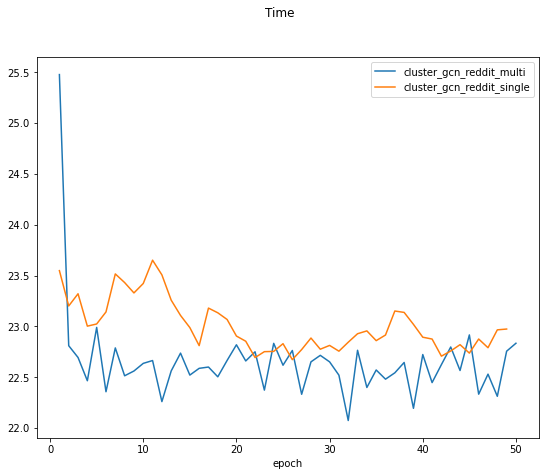

In [139]:
dataset_1 = "cluster_gcn_reddit_multi.txt"
dataset_2 = "cluster_gcn_reddit_single.txt"

A = parse_data(dataset_1)
B = parse_data(dataset_2)

cols = ['loss', 'time']

for c in cols:
    ax = A.plot(x='epoch', y = c, kind='line')
    B.plot(x='epoch', y = c, kind='line', ax=ax, figsize=(9,7))
    ax.legend([dataset_1[:-4], dataset_2[:-4]]);
    plt.suptitle(c.capitalize())

# ClusterGCN with higher batch and higher learning rate

- reddit - 7.9 Gb
- For validation, testing, kept getting out of memory issues, even after considerably changing the batch size to a small value 
- Therefore, only the loss and train accuracy is shown below:
- (worse results)

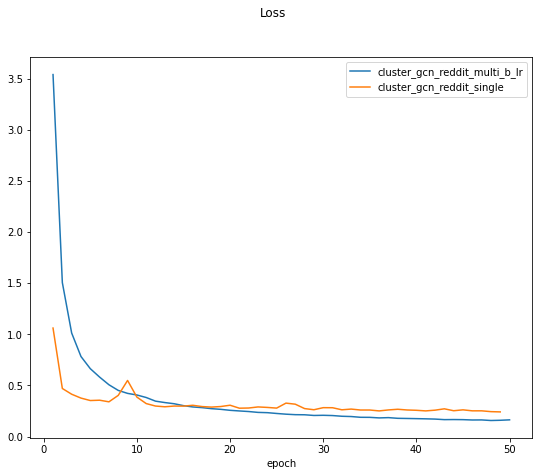

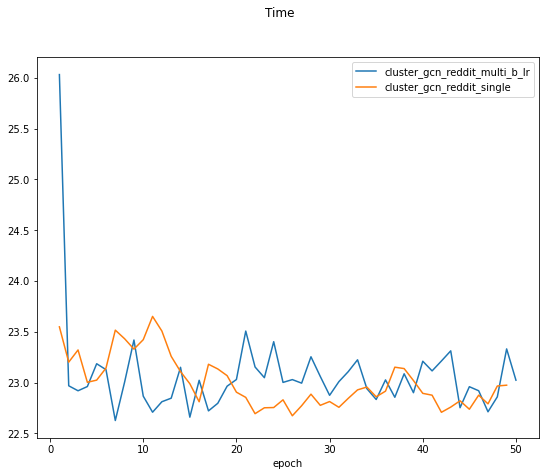

In [133]:
dataset_1 = "cluster_gcn_reddit_multi_b_lr.txt"
dataset_2 = "cluster_gcn_reddit_single.txt"

A = parse_data(dataset_1)
B = parse_data(dataset_2)

cols = ['loss', 'time']

for c in cols:
    ax = A.plot(x='epoch', y = c, kind='line')
    B.plot(x='epoch', y = c, kind='line', ax=ax, figsize=(9,7))
    ax.legend([dataset_1[:-4], dataset_2[:-4]]);
    plt.suptitle(c.capitalize())

# Graph Saint - Capital One: Results

- ogbn-products dataset - 4.7Gb

- Tried with larger number of batches -> memory issues

- Validation/Testing issue with code, once model is wrapped with DistributedDataParallel can't use  
Therefore, only the loss and train accuracy is shown below:

(best results)

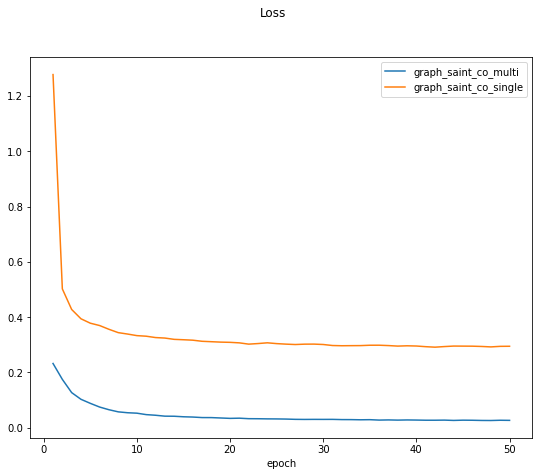

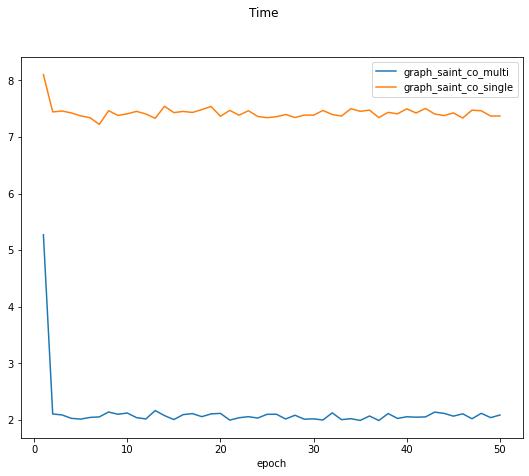

In [138]:
dataset_1 = "graph_saint_co_multi.txt"
dataset_2 = "graph_saint_co_single.txt"

A = parse_data(dataset_1)
B = parse_data(dataset_2)

cols = ['loss', 'time']

for c in cols:
    ax = A.plot(x='epoch', y = c, kind='line')
    B.plot(x='epoch', y = c, kind='line', ax=ax, figsize=(9,7))
    ax.legend([dataset_1[:-4], dataset_2[:-4]]);
    plt.suptitle(c.capitalize())

# Graph Saint - Pytorch Geometric Results

- Flickr dataset - 612 Mb

- Both Validation and Testing is shown below:

- (best results)

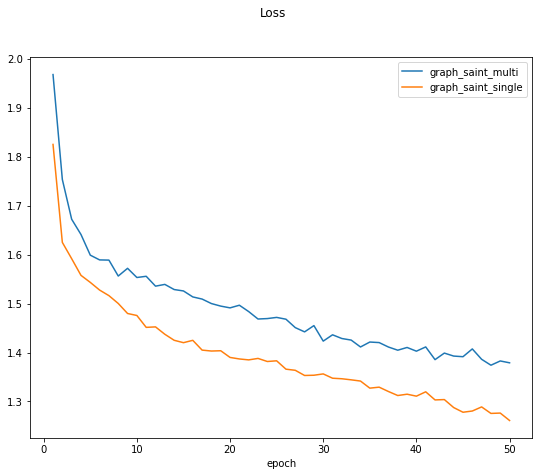

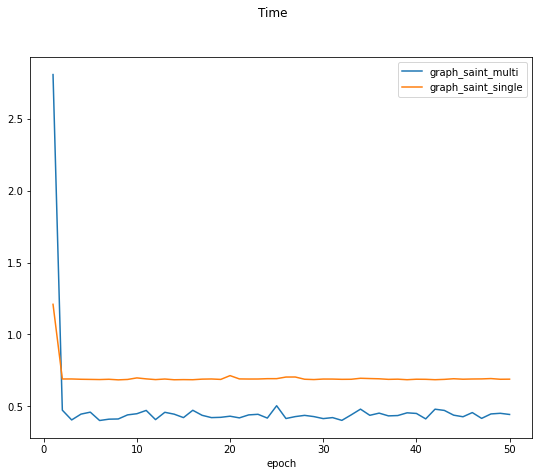

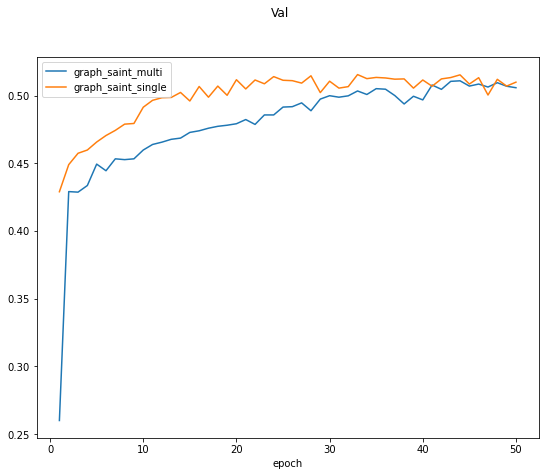

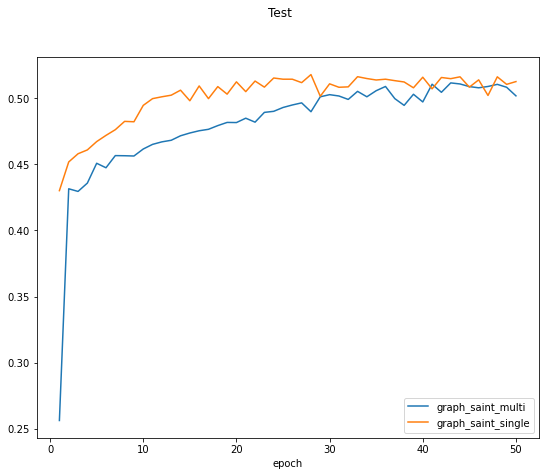

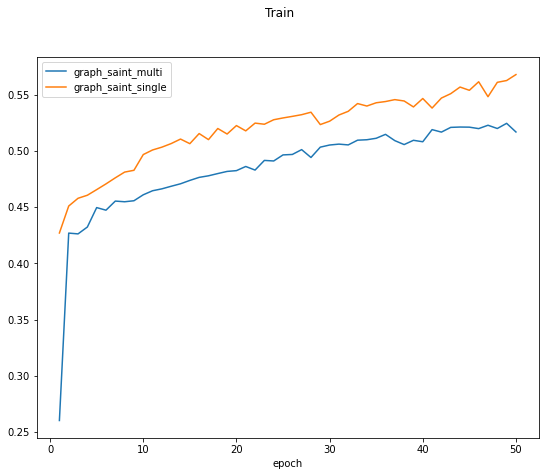

In [140]:
dataset_1 = "graph_saint_multi.txt"
dataset_2 = "graph_saint_single.txt"

A = parse_data(dataset_1)
B = parse_data(dataset_2)

cols = ['loss', 'time', 'val', 'test', 'train']

for c in cols:
    ax = A.plot(x='epoch', y = c, kind='line')
    B.plot(x='epoch', y = c, kind='line', ax=ax, figsize=(9,7))
    ax.legend([dataset_1[:-4], dataset_2[:-4]]);
    plt.suptitle(c.capitalize())